# Implementação de Árvore B

## Importando bibliotecas

In [293]:
import graphviz
from graphviz import Digraph
import collections
from collections import defaultdict
import imageio
import math
import io
import numpy as np
import base64
from IPython.display import display, HTML
from IPython.display import Image as IPythonImage, display
import random
import time
import gradio as gr
from graphviz import Digraph
from collections import defaultdict
from PIL import Image
import numpy as np
from io import BytesIO
import copy
import imageio
from IPython.display import Image as IPImage, display
import tempfile

In [294]:
#Variáveis globais
ghost=-1
leaf_elements=[] #contém elementos dos nós folha
#contadores
cont=0
cont_in=0
cont_ex=0
cont_in_lote=0
cont_ex_lote=0

#timers
t_in=0 
t_ex=0
t_busca=0
t_in_lote=0
t_ex_lote=0

#outros
v_in=[]
tr={}
grau=3
arvs=[]

In [295]:
#Criação da árvore
def cria_arv():
    global arvs
    arvs=[]
    global cont
    cont=0
    global leaf_elements
 
    
    #Estrutura inicial
    #Considera-se o primeiro nó como nó 0
    #Ele será caracterizado como nó folha
    #Seu pai é o nó -1 (inexistente)
    
    d={0:[[True,-1],[]]}
    arvs.append(copy.deepcopy(d))###--------###
    cont=cont+1
    return d

In [296]:
def insercao(d,t,k):
    global cont


    if len(d[0])==2:  # Árvore vazia: a raiz não contém nenhum elemento armazenado,
        #logo não preciso fazer comparações pra identificar o lugar onde k ficaria
        d[0].append(k)   #basta inserir no fim
        d[0].append([])  #depois inserir o espaço para o ponteiro da direita, que inicialmente será vazio
        #quando a raiz tiver filhos, os ponteiros serão atualizados
        cont=cont+2
        arvs.append(copy.deepcopy(d))###--------###
    else: #árvore possui elementos,
        ideal = folha_ideal(d,k)   # logo preciso achar o nó folha ideal para inserir k
        
        d=insere_no_nó(d,t,ideal,k)  # efetuo a inserção
    arvs.append(copy.deepcopy(d))###--------###
    return d

In [297]:
def folha_ideal(d,k):
    return folha_ideal_key(d,k,0) #configura a função folha_ideal_key para começar sua busca a partir da raiz

In [298]:
# Função recursiva que encontra a folha ideal para a inserção do elemento k
# key é o primeiro nó que ela analisa, 
# após isso ela vai "descendo" na árvore por meio dos ponteiros até achar o nó folha adequado

def folha_ideal_key(d,k,key):
    if len(d.keys())==1:  # caso em que a árvore só contém a raiz -> retorna a própria raiz (nó 0)
        return 0
    
    aux=False
    for i in range(2,len(d[key]),2):
        
        if k < d[key][i]:
            aux=True

            if d[key][0][0]:

                return key
            else:
                return folha_ideal_key(d,k,d[key][i-1][0]) #"desce" usando o ponteiro adequado

    if not aux: #k é maior que todos os elementos de key


        if d[key][0][0]: #verifica se o nó key é raiz

            return key
        
        else:  
            # se não for raiz, "desce" usando ponteiro mais à esquerda de key
            return folha_ideal_key(d,k,d[key][-1][0])


In [299]:
def insere_no_nó(d,t,j,k,opc=-1,):
    global arvs
    global cont
    global ghost #será útil em casos mais complexos de atualização de filhos
    aux=False
    for i in range(2,len(d[j]),2):  #loop para localizar a posição adequada para k no nó j
        
        if k < d[j][i]:
            aux=True
            if d[j][0][0]:
                d[j].insert(i,k)
                arvs.append(copy.deepcopy(d))###--------###
                cont=cont+1
                if opc!=-1:
                    d[j].insert(i+1,opc)
                    arvs.append(copy.deepcopy(d))###--------###
                    cont=cont+1
                else:
                    d[j].insert(i+1,[]) 
                    arvs.append(copy.deepcopy(d))###--------###
                    cont=cont+1
            
            else:
                d[j].insert(i,k)
                arvs.append(copy.deepcopy(d))###--------###
                d[j].insert(i+1,[ghost])
                arvs.append(copy.deepcopy(d))###--------###
                cont=cont+2

            break

    arvs.append(copy.deepcopy(d))###--------###
    if not aux:  #caso aux não tenha sido alterado pelas operações anteriores->
                #significa que k vai ser o elemento mais à direita no nó, o maior de todos
        d[j].insert(i+2,k)
        arvs.append(copy.deepcopy(d))###--------###
        cont=cont+1
        if d[j][0][0]:  #verifica se o nó é folha
            d[j].insert(i+3,[])  #se sim, insira a seguir um ponteiro vazio, já que nós folha não têm filhos
            arvs.append(copy.deepcopy(d))###--------###
            cont=cont+1
        else:  #nó não é folha
            d[j].insert(i+3,[ghost])  #o ponteiro inserido à direita apontará para ghost
            arvs.append(copy.deepcopy(d))###--------###
            cont=cont+1


    arvs.append(copy.deepcopy(d))###--------###
    if (len(d[j])-2)/2>t-1:  #nó ficou com mais elementos do que é permitido -> necessário operação de split(divisão)
        if len(d[j][1])==0:  
            d = divide(d,t,j)
            arvs.append(copy.deepcopy(d))###--------###

        else:
            d = divide_nao_folha(d,t,j)
            arvs.append(copy.deepcopy(d))###--------###


        

    return d

In [300]:
def search_from_key(d,k,key):
    if d[key][0][0]:
        
            if k in d[key]:
                return key
            else:
                return "Não existe!"
    if k in d[key]:
            return key
    for i in range(2,len(d[key]),2):
#         print(key,i,d[key][i],"\n")
#         if k == d[key][i]:
#             return key


        if k<d[key][i]:
            return search_from_key(d,k,d[key][i-1][0])
        if k>d[key][i]:
            return search_from_key(d,k,d[key][i+1][0])

        
    return "Não existe!"

In [301]:
def busca(d,k):
    #Busca a partir da raíz
    return search_from_key(d,k,0)

In [302]:
def divide(d,t,j):
    global ghost
    new = len(d.keys())
    aux = math.ceil(t/2)-1
    left = d[j][1:2*aux+2]

    right = d[j][2*aux+3:]
    up = d[j][2*aux+2]
    max_k = max(d.keys())
    ghost=max_k+1
    pai = d[j][0][1]
    if j != 0:
        if d[pai][-1][0]==j:
            d[max_k+1]=[[True,pai]]
            
        else:
            for i in range(1,len(d[pai]),2):
                if d[pai][i][0]==j:
                    bro=d[pai][i+2][0]
                    d[max_k+1]=[[True,pai]] 
                    break
    
        d[max_k+1].extend(right)
        d[j]=[[True,pai]]
        d[j].extend(left)

        d = insere_no_nó(d,t,pai,up,opc=[max_k+1]) 


    else:

        d[max_k+1]=[[True,pai]]
        d[max_k+1].extend(right)
        if not d[max_k+1][0][0]:
            for t in range(1,len(d[max_k+1]),2):
                filho = d[max_k+1][t][0]
                d[filho][0][1]=max_k+1

        d[j]=[[True,pai]] 
        d[j].extend(left)

        d=incrementa_1(d)
        d[0]=[[False,-1],[j+1],up,[max_k+2]]
    

    return dict(sorted(d.items()))



In [303]:
def divide_nao_folha(d,t,j):
    new = len(d.keys())
    aux = math.ceil(t/2)-1
    left = d[j][1:2*aux+2]

    right = d[j][2*aux+3:]
    
    
    up = d[j][2*aux+2]
    max_k = max(d.keys())
    global ghost 
    ghost = max_k+1
    
    for i in range(0,len(right),2):
        d[right[i][0]][0][1] = max_k+1

    
    pai = d[j][0][1]
    
    if j != 0:
        
        if d[pai][-1][0]==j:
            if d[j][0][0]:
                d[max_k+1]=[[True,pai]]
            else:
                d[max_k+1]=[[False,pai]]
              
        else:
            if d[j][0][0]:
                for i in range(1,len(d[pai]),2):
                    if d[pai][i][0]==j:
                        bro=d[pai][i+2][0]
                        d[max_k+1]=[[True,pai]] # trocar esse 9 aí
                        break                
            else:
                for i in range(1,len(d[pai]),2):
                    if d[pai][i][0]==j:

                        d[max_k+1]=[[False,pai]] 
                        break
    
        d[max_k+1].extend(right)

        if d[j][0][0]:
            d[j]=[[True,pai,max_k+1]]
        else:
            d[j]=[[False,pai]]
        d[j].extend(left)
        d = insere_no_nó(d,t,pai,up,opc=[max_k+1])

    else :
        
        right = d[j][2*aux+3:]
         # ñ precisa desse if, tirar dps
        if d[0][0][0]:
            d[max_k+1]=[[True,pai]]

        else:
            d[max_k+1]=[[False,pai]]

        d[max_k+1].extend(right)

        
        
        for t in range(1,len(d[max_k+1]),2):
            filho = d[max_k+1][t][0]
            d[filho][0][1]=max_k+1
        # ñ precisa desse if, tirar dps
        if d[0][0][0]:
            d[j]=[[True,pai]]
        else: 
            d[j]=[[False,pai]]
        d[j].extend(left)
        d=incrementa_1(d)
        d[0]=[[False,-1],[j+1],up,[max_k+2]]


    return dict(sorted(d.items()))

In [304]:
#Mecanismo para aumentar a altura da árvore
def incrementa_1(d):
    for key in sorted(d.keys(), reverse=True):
        d[key+1]=d[key]
        d[key+1][0][1]=d[key+1][0][1]+1
        for i in range(1,len(d[key+1]),2):
            if d[key+1][i]:
                d[key+1][i] = [elemento + 1 for elemento in d[key][i]]
            
    del d[0]
    return d
            
        

In [379]:
def exclusao(d,t,k):

    key = busca(d,k)  #Encontra o nó que contém o elemento k
    
    if key =="Não existe!":
        print("A árvore não possui o elemento ",k)
        return d
    d=exclui(d,t,k,key) #Exclui o elemento k do nó key da árvore d
    return d



def exclui(d,t,k,key):
    global arvs
    global cont
    #valores iniciais para a parte esquerda e direita após a exclusão do elemento k no nó key
    left=-1
    right=-1
    
    
    pai = d[key][0][1]

    i = d[key].index(k)
    
    
    d[key] = d[key][:i] + d[key][i+2:]
    arvs.append(copy.deepcopy(d))###--------###


        
    if len(d[key])>=4 and key!=0:
        g = d[pai].index([key])
        if g!=1:
            d[pai][g-1]=d[key][2]
            arvs.append(copy.deepcopy(d))###--------###

    

    arvs.append(copy.deepcopy(d))###--------###
    if key==0 and len(d[key])<4:
        if len(d)==1:
            return d
            
        del d[key]

        d[0]=d[1]
        d[0][0][1]=-1
        

        if not d[0][0][0]:
            
            d=atualiza_o_pai_dos_filhos_de_key(d,0,0)

            del d[1]
           
            filho=d[0][1][0]
            d[1]=d[filho]
            del d[filho]
            d[0][1][0]=1

        return d
        
         
    
    arvs.append(copy.deepcopy(d))###--------###
    if pai>=0:
        j = d[pai].index([key])
        if j-3>=0:
            left = d[pai][j-2][0]
        if j+3 <= len(d[pai]):
            right = d[pai][j+2][0]
        arvs.append(copy.deepcopy(d))###--------###

    arvs.append(copy.deepcopy(d))###--------###    
    if (len(d[key])-2)/2<math.ceil((t-1)/2):
        

        if left>0:
                if (len(d[left])-2)/2> math.ceil((t-1)/2):
                 
                    d=redistribua(d,t,left,key)
                   
                elif right>0 and (len(d[right])-2)/2> math.ceil((t-1)/2): #acrescentei isso, verificar essa parte na B+ tb
                    
                    d=redistribua(d,t,key,right)
                else: 
                    d=merge(d,t,left,key)
                
        else:
            if (len(d[right])-2)/2> math.ceil((t-1)/2):     
                d=redistribua(d,t,key,right)
                
            else: 
                d=merge(d,t,key,right)
        


    return dict(sorted(d.items()))
      

In [522]:
def merge(d,t,left,right):
    global cont
    pai = d[left][0][1]
    i = d[pai].index([left])
    meio = d[pai][i+1]
    cont = cont+3
    
    if pai==0 and len(d[pai])==4:

        if len(d[right])+len(d[left]) < 2*t+2:
            if len(d[left])==2 and not d[left][0][0]:
                aux = d[right][1][0]
                d[0]=d[left]+[d[aux][2]]+d[right][1:]
                cont = cont+2
            elif d[left][0][0]:
                if len(d[right])==2:
                    d[0]=d[left]
                    cont = cont+1
                else:
                    d[0]=d[left]+d[right][2:]
                    cont = cont+2
            else:
                d[0]=d[left]+[d[0][2]]+d[right][1:]
                cont = cont+1
                              
            d[0][0][1]=-1
            cont = cont+1        
                  
            if not d[0][0][0]:
                d=atualiza_o_pai_dos_filhos_de_key(d,0,0)
                del d[1]

                filho=d[0][1][0]
                d[1]=d[filho]
                
                d=atualiza_o_pai_dos_filhos_de_key(d,1,1)
                del d[filho]
                del d[right]
                d[0][1][0]=1
                cont = cont+3
            else:
                del d[left]
                del d[right]
                d[0][0]=d[0][0][:2]
                cont = cont+1
            return d
            
            
            
        return d
    if (len(d[left])-2)/2<math.ceil((t-1)/2):
        

        
        if (len(d[left]))%2==0:
            if not d[left][0][0]:
                aux = d[right][1][0]

                d[left].append(d[aux][2])
 
                d[left].extend(d[right][1:])
                cont = cont+3
            else:
                d[left].extend(d[right][2:])
                cont = cont+1
        else:
            d[left].extend(d[right][1:])
            cont = cont+1
            
            

    
        d = atualiza_o_pai_dos_filhos_de_key(d,right,left)


#         if d[left][0][0]:
#             d[left][0][2]=d[right][0][2]


        del d[right]

        
        d=exclui(d,t,meio,pai)     


        return d
    
    if (len(d[right])-2)/2<math.ceil((t-1)/2):
   

            
        if len(d[right])==2 and not d[right][0][0]:
            aux=d[right][1][0]
            d[left].extend([d[aux][2],d[right][1]])
            d = atualiza_o_pai_dos_filhos_de_key(d,right,left)
            cont = cont+2

        if len(d[right])==2 and d[right][0][0]:
            print("HA",d[pai],d[left],d[right],"\n")
#             d[left].extend([meio,[]])
        if d[left][0][0] and len(d[right][0])==2:
            d[left][0]=d[left][0][:2]
            cont = cont+1
            
        
        del d[right]
        
        print("\n",d[pai],meio)
        
        d=exclui(d,t,meio,pai)
        
        return d
        
    return d

In [619]:
def redistribua(d,t,left,right):
    print(d[left],d[right])
    global cont
    pai = d[left][0][1]
    l=len(d[left])
    r=len(d[right])
    total = int((l+r-2)/2)
    ql = math.ceil(total/2)
    qr = total - ql
    cont = cont+3
    
    if len(d[right])>=4:
        new = d[left][1:]+d[right][2:]
        cont = cont+1
        
    else: 
        new = d[left][1:]
        cont = cont+1
    
    
    if d[left][0][0]:
        contador=0
        for m in new:
            if m==[]:
                contador=contador+1
            else:
                contador=contador-1
            if contador==2:
                g=new.index([])
                new=new[:g]+new[g+1:]
                break
                


        d[left]=[d[left][0]]+new[:ql]+[[]]
        d[right] = [d[right][0]]+new[ql:]
        
        d[pai][2]=d[right][2]
        cont = cont+3
        return d
    
 

    print("new",new)
    print("d[left]",d[left])
    print("d[right]",d[right])
    aux = d[left][2*ql:]
    print("new",new)
    
    print("new[:2*ql]",new[:ql+1])
    d[left] = [d[left][0]]
    d[left].extend(new[:ql+1])

    print("novo d[left]",d[left])
    temp_right = d[right][3:]
    d[right]= [d[right][0]]
    d[right].extend(aux)
    d[right].extend(temp_right)
    print("novo d[right]",d[right])

#     d[pai][2]=d[right][2][0]
    cont = cont+4
    return d

In [620]:
def atualiza_o_pai_dos_filhos_de_key(d,velho_pai,novo_pai):
    if not d[velho_pai][0][0]:
        for i in range(1,len(d[velho_pai]),2):
            
            f=d[velho_pai][i][0]
           
            d[f][0][1]=novo_pai
    return d

In [17]:
# Visualização da árvore
def plot_bplus_tree(tree, key=None):
    dot = Digraph()  # Cria um objeto Digraph para representar o gráfico
    dot.attr(rankdir='TB')    # Define a orientação do gráfico como de cima para baixo
    levels = defaultdict(list)    # Dicionário para armazenar os nós em cada nível da árvore

    def traverse(node, level):
        data = tree[node]  # Obtém os dados do nó atual
        is_leaf = data[0][0]  # Verifica se o nó é uma folha
        parent = data[0][1]  # Obtém o pai do nó
        next_leaf = data[0][2] if len(data[0]) > 2 else None  # Obtém o próximo nó folha
        values = [x for x in data[1:] if not isinstance(x, list)]  # Obtém os valores armazenados no nó
        values_cells = ''.join(f'<TD>{x}</TD>' for x in values)  # Cria as células para os valores na tabela

        if len(data) == 2 and len(data[1]) == 0:
            # Verifica se o nó é uma folha vazia, sem valores
            label = f'''<
                <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
                  <TR><TD BORDER="0" COLSPAN="1"><FONT COLOR="blue">{node}</FONT></TD></TR>
                  <TR><TD>&nbsp;</TD></TR>
                </TABLE>
            >'''
        else:
            # Cria a representação do nó com seus valores na tabela
            label = f'''<
                <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
                  <TR><TD BORDER="0" COLSPAN="{len(values) or 1}"><FONT COLOR="blue">{node}</FONT></TD></TR>
                  <TR>{values_cells}</TR>
                </TABLE>
            >'''

        if key is not None and node == key:
            # Verifica se o nó é o nó destacado e define a cor como vermelho
            shape = 'doublecircle'
            fillcolor = 'red'
        elif is_leaf:
            # Define a forma e a cor do nó folha
            shape = 'circle'
            fillcolor = 'lightblue'
        else:
            # Define a forma e a cor do nó interno
            shape = 'circle'
            fillcolor = 'lightgoldenrod1'

        # Adiciona o nó ao gráfico com a representação visual
        dot.node(str(node), label=label, shape=shape, style='filled', fillcolor=fillcolor)
        
        if is_leaf and next_leaf is not None:
            # Cria uma aresta pontilhada para conectar duas folhas consecutivas
            dot.edge(str(node), str(next_leaf), color='deeppink', style='dashed')
        
        if parent != -1:
            # Cria uma aresta para conectar o nó ao seu pai
            dot.edge(str(parent), str(node), color='aquamarine4')
        
        levels[level].append(node)  # Adiciona o nó ao nível correspondente

        for child in data[1:]:
            if isinstance(child, list) and child:
                # Se o filho é uma lista não vazia, chama a função de travessia recursiva
                traverse(child[0], level + 1)

    traverse(0, 0)  # Inicia a travessia da árvore a partir do nó raiz

    # Organiza os nós no mesmo nível na mesma linha
    for level_nodes in levels.values():
        with dot.subgraph() as s:
            s.attr(rank='same')
            for node in level_nodes:
                s.node(str(node))

    return dot  # Retorna o gráfico gerado


def show(tree, key=None):
    dot = plot_bplus_tree(tree, key=key)  # Cria o gráfico da árvore
    image = dot.pipe(format='png')  # Gera a imagem do gráfico
    display(IPythonImage(image))  # Exibe a imagem no notebook


In [633]:
def insere_aleatoriamente(d,t,n,minimo,maximo):
    start_time = time.time()
    if maximo - minimo + 1 < n:
        raise ValueError("Não é possível gerar a quantidade de números desejada no intervalo especificado.")
    
    numbers = random.sample(range(minimo, maximo+1), n)
    
    for i in numbers:
        d=insercao(d,t,i)
        print("####   inserção de: ", i,"  #####")
        show(d)
        print("\n")
        
    print("--- %s seconds ---" % (time.time() - start_time)) # 
    return d

####   inserção de:  62   #####


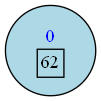



####   inserção de:  10   #####


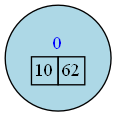



####   inserção de:  38   #####


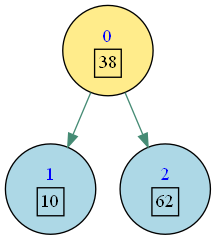



####   inserção de:  55   #####


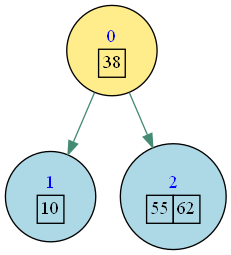



####   inserção de:  11   #####


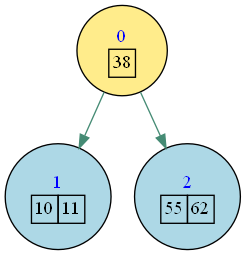



####   inserção de:  71   #####


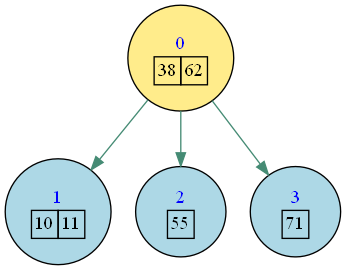



####   inserção de:  79   #####


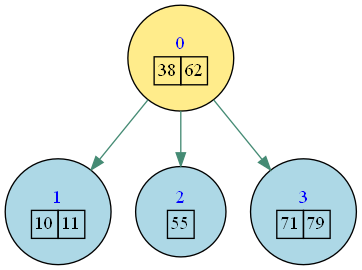



####   inserção de:  63   #####


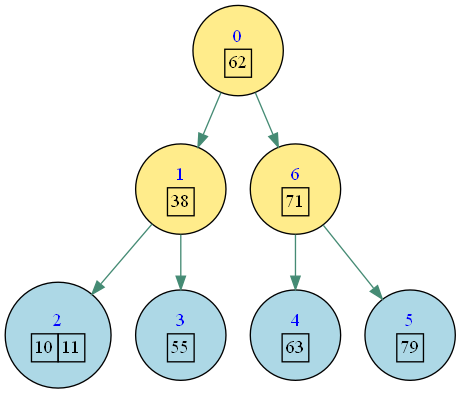



####   inserção de:  77   #####


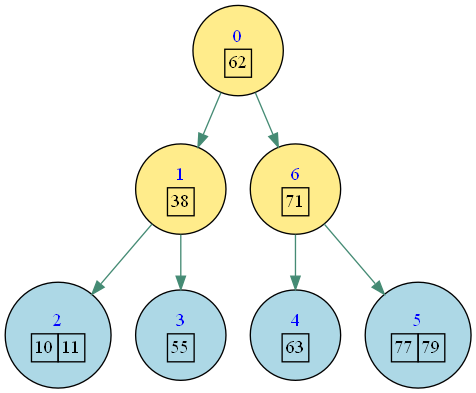



####   inserção de:  7   #####


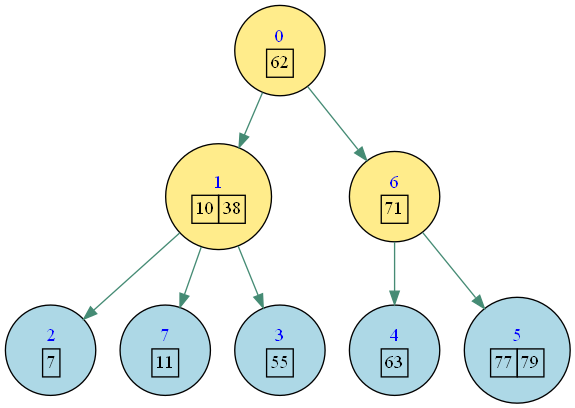



--- 0.499225378036499 seconds ---


In [634]:
d = cria_arv()
d=insere_aleatoriamente(d,3,10,1,100)

In [635]:
d

{0: [[False, -1], [1], 62, [6]],
 1: [[False, 0], [2], 10, [7], 38, [3]],
 2: [[True, 1], [], 7, []],
 3: [[True, 1], [], 55, []],
 4: [[True, 6], [], 63, []],
 5: [[True, 6], [], 77, [], 79, []],
 6: [[False, 0], [4], 71, [5]],
 7: [[True, 1], [], 11, []]}

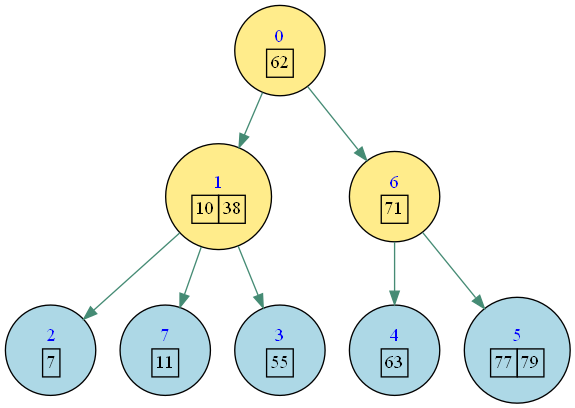

In [636]:
show(d)

In [637]:
def remove_aleatoriamente(d,t,n):
    elements = set()  
    for key, value in d.items():
        for item in value:
                if not isinstance(item, list):
                    elements.add(item)




    start_time = time.time()
    print(elements)
    random_elements = random.sample(list(elements),n)
    print("Elementos a serem removidos: ",random_elements,"\n")

    for i in random_elements:
        d=exclusao(d,t,i)
        print("####   exclusão de: ", i,"  #####")
        show(d)
        print("\n")

    print("--- %s seconds ---" % (time.time() - start_time)) # 
    return d

{38, 7, 71, 10, 11, 77, 79, 55, 62, 63}
Elementos a serem removidos:  [11, 55, 62, 10, 71] 

HA [[False, 0], [2], 10, [7], 38, [3]] [[True, 1], [], 7, []] [[True, 1], []] 


 [[False, 0], [2], 10, [7], 38, [3]] 10
####   exclusão de:  11   #####


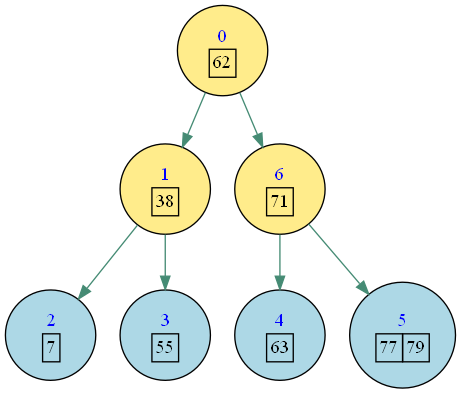



HA [[False, 0], [2], 38, [3]] [[True, 1], [], 7, []] [[True, 1], []] 


 [[False, 0], [2], 38, [3]] 38
####   exclusão de:  55   #####


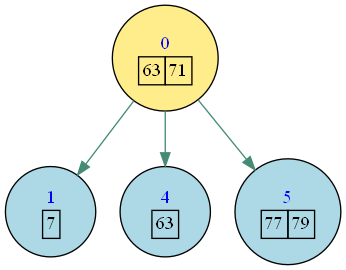



A árvore não possui o elemento  62
####   exclusão de:  62   #####


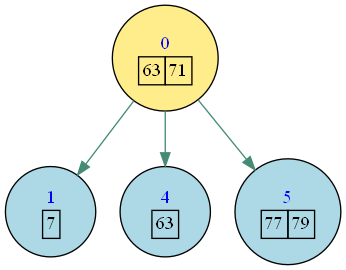



A árvore não possui o elemento  10
####   exclusão de:  10   #####


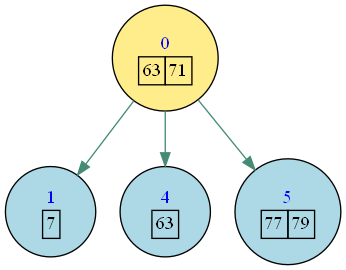



####   exclusão de:  71   #####


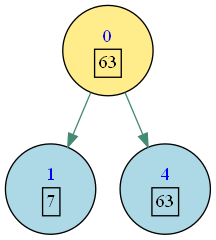



--- 0.3540647029876709 seconds ---


In [638]:
d=remove_aleatoriamente(d,3,5)

# Inserções Manuais

## Exemplo 1

In [42]:
tree=cria_arv()
tree = insercao(tree,3,9)
tree = insercao(tree,3,4)
tree = insercao(tree,3,50)
tree = insercao(tree,3,56)
tree = insercao(tree,3,7)
tree = insercao(tree,3,15)
tree = insercao(tree,3,12)
tree = insercao(tree,3,5)
tree = insercao(tree,3,6)
tree = insercao(tree,3,1)
tree = insercao(tree,3,2)
tree = insercao(tree,3,20)
tree = insercao(tree,3,26)
tree = insercao(tree,3,10)

In [43]:
tree

{0: [[False, -1], [1], 9, [6]],
 1: [[False, 0], [2], 2, [7], 5, [5]],
 2: [[True, 1], [], 1, []],
 3: [[True, 6], [], 10, [], 12, []],
 4: [[True, 6], [], 56, []],
 5: [[True, 1], [], 6, [], 7, []],
 6: [[False, 0], [3], 15, [8], 50, [4]],
 7: [[True, 1], [], 4, []],
 8: [[True, 6], [], 20, [], 26, []]}

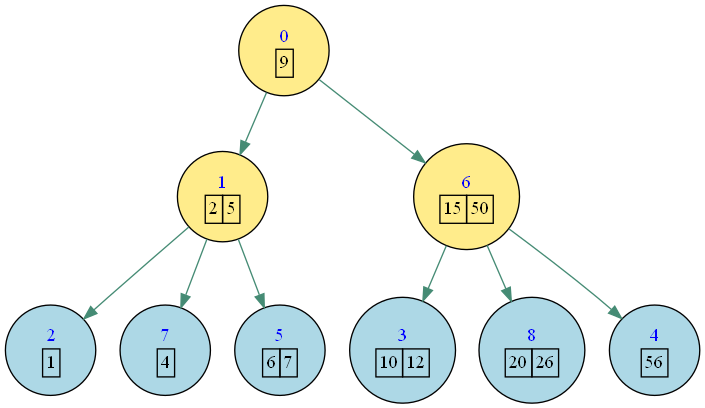

In [44]:
show(tree)

# Busca

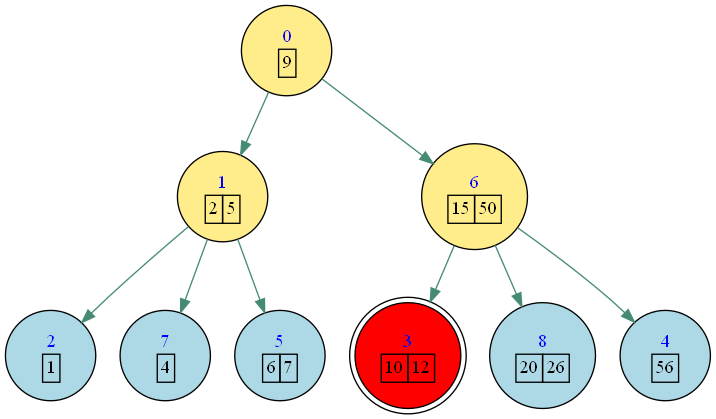

In [45]:
f=busca(tree,10)
show(tree, key=f)

# Exemplo 2

In [258]:
tree=cria_arv()
tree = insercao(tree,3,69)
tree = insercao(tree,3,78)
tree = insercao(tree,3,43)
tree = insercao(tree,3,93)
tree = insercao(tree,3,7)
tree = insercao(tree,3,19)
tree = insercao(tree,3,24)
tree = insercao(tree,3,30)
tree = insercao(tree,3,32)
tree = insercao(tree,3,13)
tree = insercao(tree,3,12)
tree = insercao(tree,3,15)
tree = insercao(tree,3,29)
tree = insercao(tree,3,5)
tree = insercao(tree,3,46)
tree = insercao(tree,3,15)
tree = insercao(tree,3,2)
tree = insercao(tree,3,50)
tree = insercao(tree,3,26)
tree = insercao(tree,3,22)

tree = insercao(tree,3,35)
tree = insercao(tree,3,41)
tree = insercao(tree,3,17)
tree = insercao(tree,3,72)
tree = insercao(tree,3,33)
tree = insercao(tree,3,48)
tree = insercao(tree,3,4)

In [259]:
tree

{0: [[False, -1], [1], 30, [16]],
 1: [[False, 0], [2], 15, [11]],
 2: [[False, 1], [3], 5, [12], 12, [8]],
 3: [[True, 2], [], 2, [], 4, []],
 4: [[True, 19], [], 72, []],
 5: [[True, 11], [], 22, [], 24, []],
 6: [[True, 7], [], 32, [], 33, []],
 7: [[False, 16], [6], 35, [14]],
 8: [[True, 2], [], 13, []],
 9: [[True, 15], [], 46, []],
 10: [[True, 11], [], 15, [], 17, []],
 11: [[False, 1], [10], 19, [5], 26, [13]],
 12: [[True, 2], [], 7, []],
 13: [[True, 11], [], 29, []],
 14: [[True, 7], [], 41, []],
 15: [[False, 16], [9], 48, [18]],
 16: [[False, 0], [7], 43, [15], 69, [19]],
 17: [[True, 19], [], 93, []],
 18: [[True, 15], [], 50, []],
 19: [[False, 16], [4], 78, [17]]}

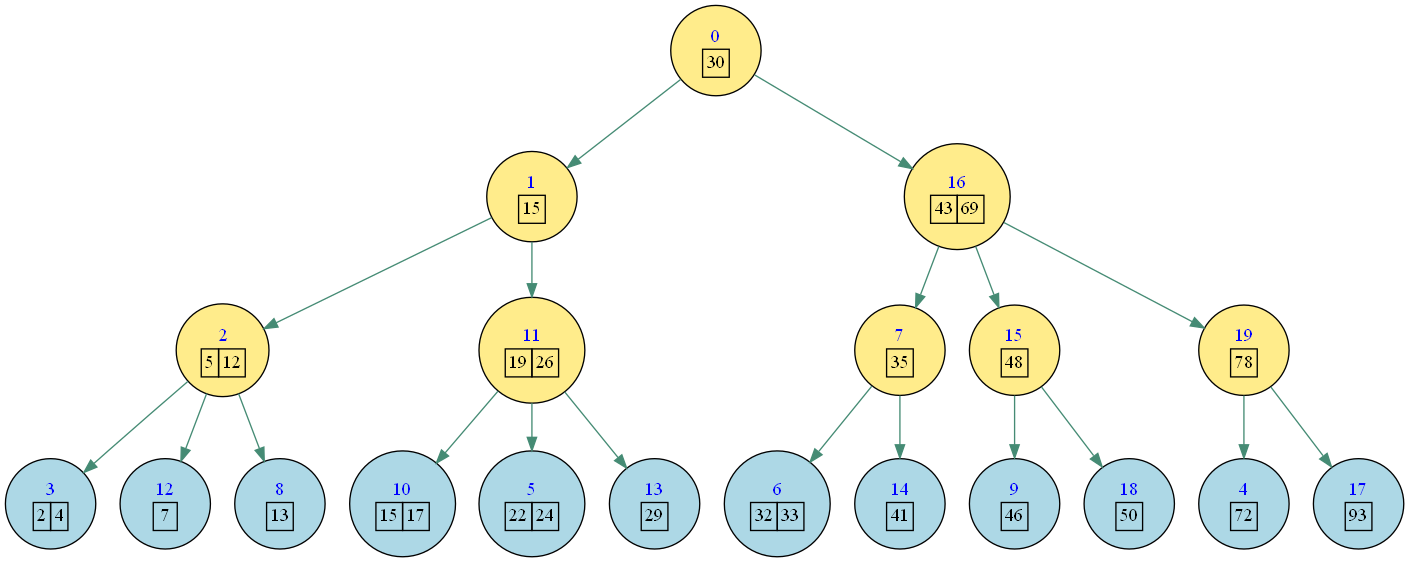

In [260]:
show(tree)

# GIF

In [26]:
def gif():
    global arvs
    lista_tree=[]
    for tree in arvs:
        dot = plot_bplus_tree(tree)  # Cria o gráfico da árvore
        image = dot.pipe(format='png')  # Gera a imagem do gráfico
        lista_tree.append(image)
    # Lista de imagens em bytes
    imagens_bytes = lista_tree  # Sua lista de imagens em bytes aqui

    # Tamanho desejado para as imagens redimensionadas
    largura = 800
    altura = 600

    # Converter bytes em objetos PIL.Image.Image e redimensionar as imagens
    imagens = []
    for imagem_bytes in imagens_bytes:
        imagem_pil = Image.open(BytesIO(imagem_bytes))
        imagem_redimensionada = imagem_pil.resize((largura, altura))
        imagens.append(imagem_redimensionada)

    # Criar um arquivo GIF temporário
    imagens[0].save('animacao.gif', format='GIF', append_images=imagens[1:], save_all=True, duration=1000, loop=0)

    # Exibir o GIF no Jupyter Notebook
    display(IPImage(filename='animacao.gif'))


In [27]:
tree=cria_arv()
tree = insercao(tree,3,9)
tree = insercao(tree,3,4)
tree = insercao(tree,3,50)
tree = insercao(tree,3,56)
tree = insercao(tree,3,7)
tree = insercao(tree,3,19)
tree = insercao(tree,3,24)
tree = insercao(tree,3,30)
tree = insercao(tree,3,32)
tree = insercao(tree,3,29)
tree = insercao(tree,3,39)
tree = insercao(tree,3,15)
tree = insercao(tree,3,12)
tree = insercao(tree,3,5)
tree = insercao(tree,3,6)
tree = insercao(tree,3,1)
tree = insercao(tree,3,2)
tree = insercao(tree,3,20)
tree = insercao(tree,3,26)
tree = insercao(tree,3,10)

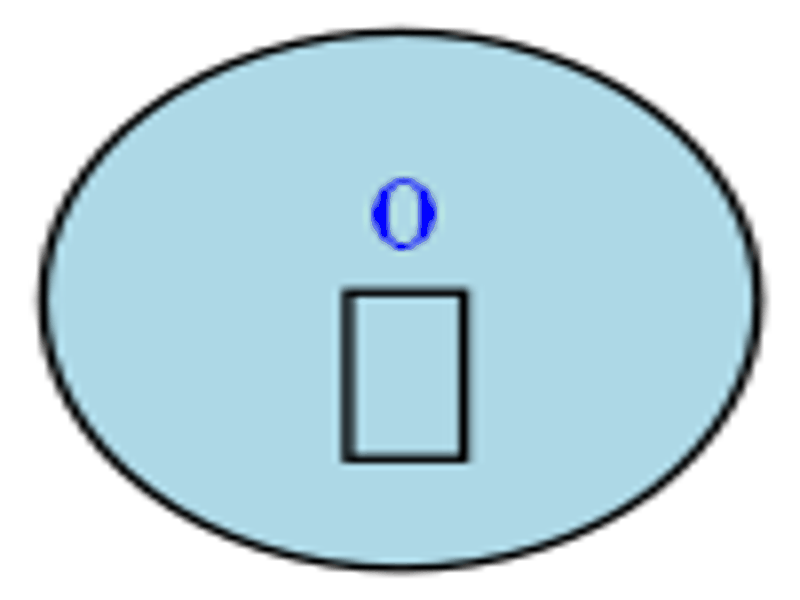

In [28]:
gif()

# Parte Interativa

In [346]:

def show_gr(tree,key=None):
    dot = plot_bplus_tree(tree,key=key)
    image = dot.pipe(format='png')
    image_pil = Image.open(BytesIO(image))
    return image_pil


def show_image_gr(tree,key=None):
    image = show_gr(tree,key=key)
    width, height = image.size
    max_width = 800  # Largura máxima desejada da imagem
    ratio = max_width / width
    new_width = max_width
    new_height = int(height * ratio)
    resized_image = image.resize((new_width, new_height))
    return resized_image




def cria_arv_gr(t):
    global grau
    global v_in
    v_in=[]
    grau=t
    global tr 
    tr= cria_arv()
  
    return show_image_gr(tr)

def insercao_gr(k):
    global cont
    global grau
    global tr 
    global t_in
    global cont_in
    
    r=cont
    
    t_in= time.perf_counter()
    tr= insercao(tr,grau,k)
    t_in = time.perf_counter()-t_in
    cont_in = cont-r
    print("##### Inserção de ",k," ####")
    print("Contador",cont_in)
    print("Timer",t_in)
    print("########################\n")
    
    image = Image.new("RGB", (50, 50), color=(255, 255, 255))
    
    # Converta a imagem para bytes
    image_bytes = io.BytesIO()
    image.save(image_bytes, format="PNG")
    image_bytes.seek(0)
  
    # Retorne a imagem
    return show_image_gr(tr)
    
    
def exclusao_gr(k):
    global cont
    global grau
    global tr
    global t_ex
    global cont_ex
    
    r=cont
    
    t_ex= time.perf_counter()
    tr = exclusao(tr,grau,k)
    t_ex = time.perf_counter()-t_ex
    cont_ex=cont-r
    print("##### Deleção de ",k," ####")
    print("Contador",cont_ex)
    print("Timer",t_ex)
    print("########################\n")
    
    return show_image_gr(tr)
def busca_gr(k):
    global tr
   
    global t_busca
    t_busca = time.perf_counter()
    t_busca = time.perf_counter()-t_busca
    
    print("##### Busca de ",k," ####")

    print("Timer",t_busca)
    print("########################\n")
    return busca(tr,k)

def mostra_gr(k):
    global tr

    f=busca(tr,k)
    return show_image_gr(tr,key=f)






def in_lote(n,minimo,maximo):
    global v_in
    global cont
    global cont_in_lote
    global tr
    global grau
    global t_in_lote
    minimo = int(minimo)
    maximo=int(maximo)
    n = int(n)
    if maximo - minimo + 1 < n:
        raise ValueError("Não é possível gerar a quantidade de números desejada no intervalo especificado.")
        
        
    numbers = random.sample(range(minimo, maximo+1), n)
    

    r=cont
    t_in_lote= time.perf_counter()
    for i in numbers:
        tr=insercao(tr,grau,i)
    t_in_lote = time.perf_counter()-t_in_lote
    cont_in_lote = cont-r

    v_in = numbers

    print("##### Inserção de ",numbers," ####")
    print("Contador",cont_in_lote)
    print("Timer",t_in_lote)
    print("########################\n")
    return show_image_gr(tr)
  





def ex_lote(n):
  
    n = int(n)
    global cont
    global cont_ex_lote
    global tr
    global grau
    global t_ex_lote
    global leaf_elements
    
    elements = set()  
    for key, value in tr.items():
        for item in value:
                if not isinstance(item, list):
                    elements.add(item)
    random_elements = random.sample(list(elements),n)
    r=cont
    t_ex_lote= time.perf_counter()
    for i in random_elements:
        tr=exclusao(tr,grau,i)
        
    t_ex_lote = time.perf_counter()-t_ex_lote
    cont_ex_lote = cont-r   

        
        
    print("##### Deleção de ",random_elements," ####")
    print("Contador",cont_ex_lote)
    print("Timer",t_ex_lote)
    print("########################\n")
    
    return show_image_gr(tr)

In [347]:
with gr.Blocks() as demo:

    
    
    with gr.Tab("Cria nova árvore"):
        nova_input = gr.Number(label="Grau", minimum=3, maximum=10,value=3)
        nova_button = gr.Button("Criar")
        nova_output = gr.Image()
        
        
        
    with gr.Tab("Inserção"):

        insere_input = gr.Number(label="Número a ser inserido")
        insere_button = gr.Button("Inserir")
        insere_output = gr.Image()
        
        
    with gr.Tab("Inserção Em Lote"):

        in_lote_insere = gr.Number(label="Quantidade")
        in_lote_min = gr.Number(label="Mínimo")
        in_lote_max = gr.Number(label="Máximo")
        in_lote_insere_button = gr.Button("Inserir")
        in_lote_insere_output = gr.Image()
        
        
    with gr.Tab("Exclusão"):

        exclui_input = gr.Number(label="Número a ser excluído")
        exclui_button = gr.Button("Excluir")
        exclui_output = gr.Image()
        
  
    with gr.Tab("Exclusão em Lote"):

        ex_lote_exclui = gr.Number(label="Quantidade")
        ex_lote_exclui_button = gr.Button("Excluir")
        ex_lote_exclui_output = gr.Image()

    with gr.Tab("Busca"):
        busca_input = gr.Number(label="Número a ser buscado")
        busca_button = gr.Button("Buscar")
        busca_output = gr.Textbox(label="Nó")
        f = gr.Image()
        
        



        
    nova_button.click(cria_arv_gr, inputs=nova_input,outputs=nova_output)
    
    insere_button.click(insercao_gr, inputs=insere_input, outputs=insere_output)

    
    in_lote_insere_button.click(in_lote, inputs=[in_lote_insere,in_lote_min,in_lote_max], outputs=in_lote_insere_output)

    
    exclui_button.click(exclusao_gr, inputs=exclui_input, outputs=exclui_output)

    
    ex_lote_exclui_button.click(ex_lote, inputs=ex_lote_exclui, outputs=ex_lote_exclui_output)

    
    busca_button.click(busca_gr, inputs=busca_input, outputs=busca_output)

    busca_button.click(mostra_gr, inputs=busca_input, outputs=f)

demo.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


##### Inserção de  [209, 94, 44, 128, 48, 208, 123, 207, 83, 76]  ####
Contador 26
Timer 0.0022596000017074402
########################



Traceback (most recent call last):
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\gradio\routes.py", line 437, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\gradio\blocks.py", line 1352, in process_api
    result = await self.call_function(
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\gradio\blocks.py", line 1077, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\ranes\.conda\envs\Pandora\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:

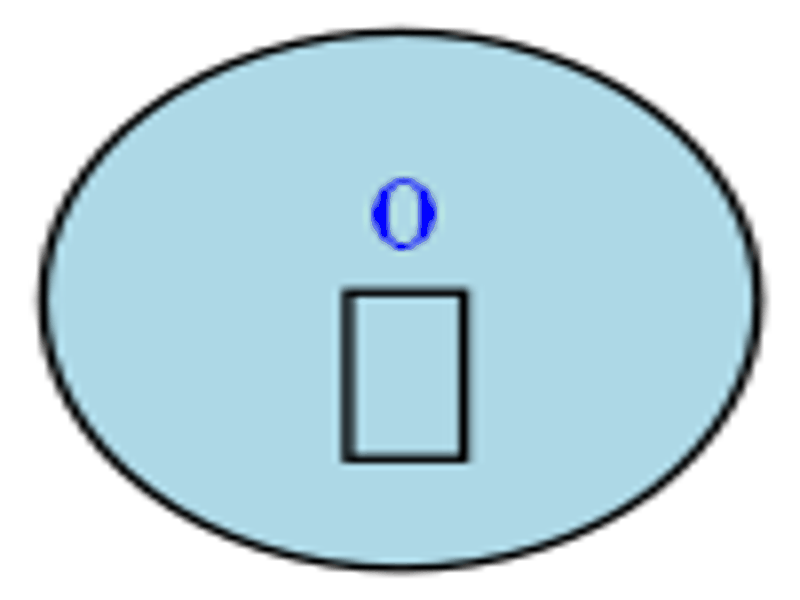

In [31]:
gif()